In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader
from pandas_datareader import data,wb

# For time stamps
from datetime import datetime


C:\Users\Consultant\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)



Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
#Apple, Google, Microsoft, Amazon
tech_list =["AAPL","GOOG","MSFT","AMZN"]

In [3]:
#From October 2014 to October 2016
end = datetime.now()
start = datetime (end.year-2,end.month,end.day)

In [4]:
#For loop for grabbing from yahoo finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock] = DataReader(stock,"yahoo",start,end)

In [5]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000
mean,111.849463,112.867276,110.758767,111.818151,4.743837e+07,109.585869
std,11.134303,11.103814,11.049950,11.062631,2.035536e+07,10.250511
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,102.929997,104.800003,102.564999,103.125000,3.310945e+07,101.318244
50%,111.620003,112.559998,109.790001,111.730003,4.339550e+07,109.072698
75%,120.795002,121.584999,119.349998,120.299999,5.605175e+07,117.654762
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,129.180748


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2014-10-06 to 2016-10-03
Data columns (total 6 columns):
Open         503 non-null float64
High         503 non-null float64
Low          503 non-null float64
Close        503 non-null float64
Volume       503 non-null int64
Adj Close    503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


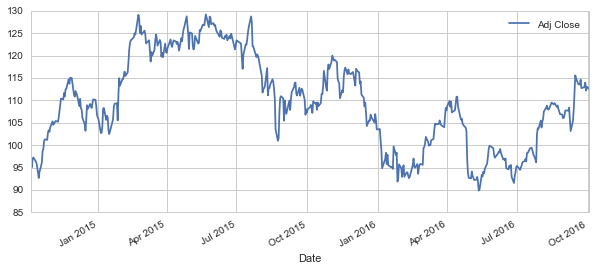

In [7]:
#Historical view of the closing price
AAPL["Adj Close"].plot(legend=True,figsize=(10,4))

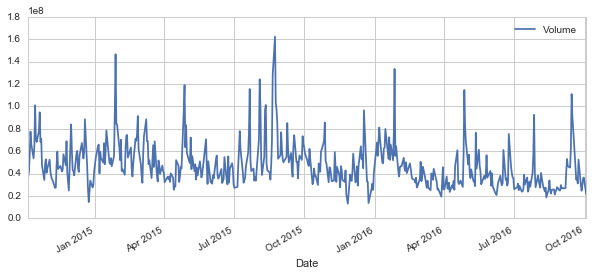

In [8]:
#Total volume of stocks traded over the past 2 years
AAPL["Volume"].plot(legend=True,figsize=(10,4))

In [9]:
#Loop computing rolling averages on 50, 100 and 200 days windows
ma_day = [50,100,200]

for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL["Adj Close"].rolling(window=ma).mean()

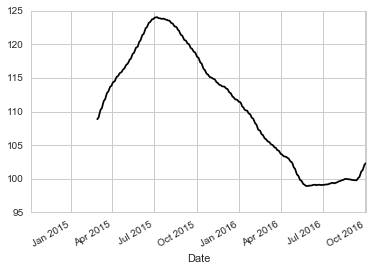

In [10]:
#rolling average alone
AAPL["MA for 100 days"].plot(style="k")


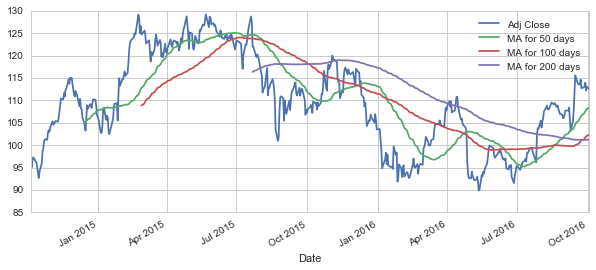

In [11]:
#all the additional Moving Averages
AAPL[["Adj Close","MA for 50 days","MA for 100 days","MA for 200 days"
     ]].plot(subplots=False,figsize = (10,4))

In [12]:
#Analysis of Daily returns

#computing of daily returns
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()

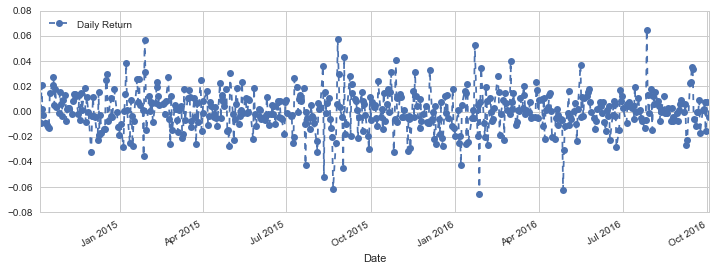

In [13]:
#Plot Daily return percentage
AAPL["Daily Return"].plot(figsize=(12,4),legend = True, linestyle="--", marker = "o")

C:\Users\Consultant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


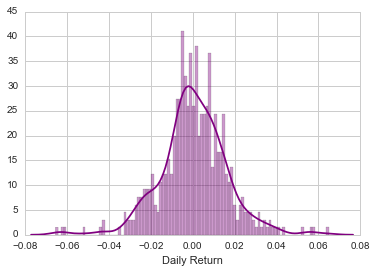

In [14]:
#Plot Kde + histo with seaborn
sns.distplot(AAPL["Daily Return"].dropna(),bins=100,color = "purple")

In [17]:
#Analysis of every stock in firstl ist (Google, Amazon...)
closing_df = DataReader(tech_list,"yahoo", start, end)["Adj Close"]

In [45]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-10-06,95.895318,322.200012,577.352614,43.689651
2014-10-07,95.057844,316.980011,563.742534,43.158814
2014-10-08,97.031200,322.700012,572.502582,44.343714
2014-10-09,97.242968,315.369995,560.882518,43.462148
2014-10-10,96.963817,311.390015,544.492476,41.736933


In [19]:
#New DF tech returns
tech_rets = closing_df.pct_change()

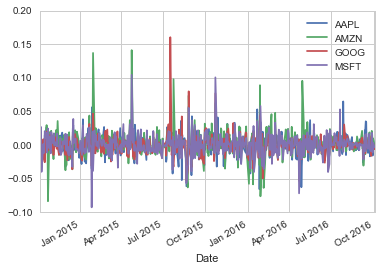

In [20]:
tech_rets.plot()

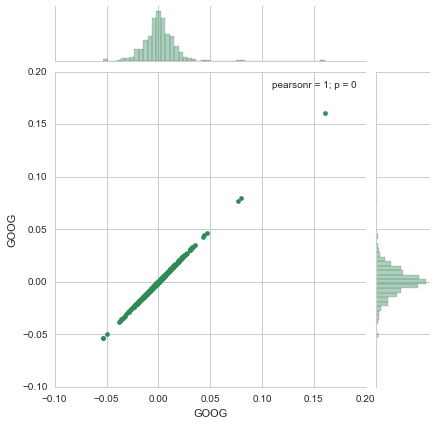

In [21]:
#Test of comparison between stocks. Google with itself is linear, which is somewhat expected.
sns.jointplot("GOOG","GOOG",tech_rets,kind="scatter",color = "seagreen")

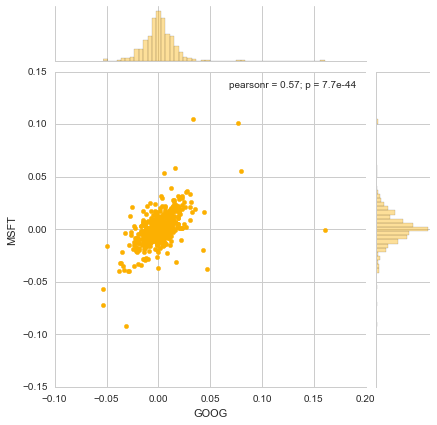

In [22]:
sns.jointplot("GOOG","MSFT",tech_rets,kind="scatter",color = "#fcb001")

In [23]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-10-06,NaN,NaN,NaN,NaN
2014-10-07,-0.008733,-0.016201,-0.023573,-0.012150
2014-10-08,0.020760,0.018045,0.015539,0.027454
2014-10-09,0.002182,-0.022715,-0.020297,-0.019880
2014-10-10,-0.002871,-0.012620,-0.029222,-0.039695


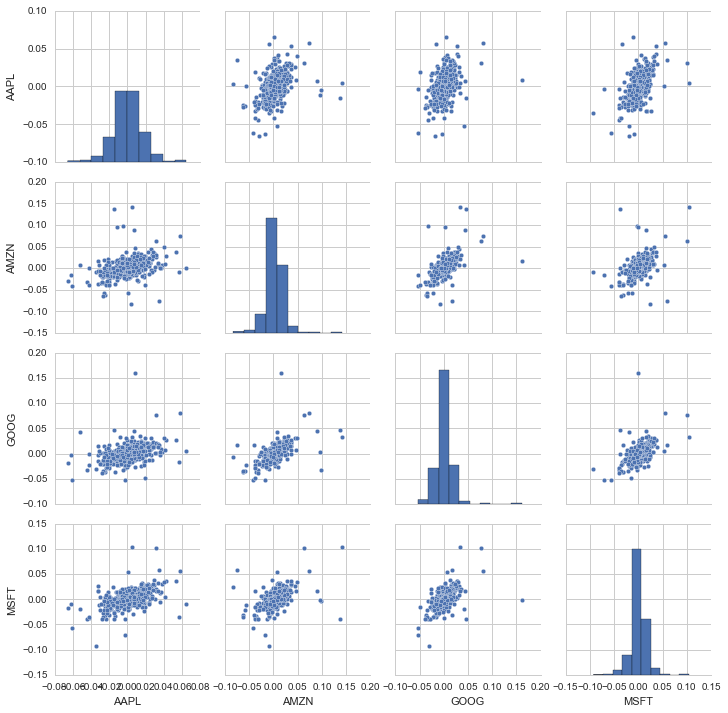

In [24]:
#Pairplot : compares each stock with one another
sns.pairplot(tech_rets.dropna())

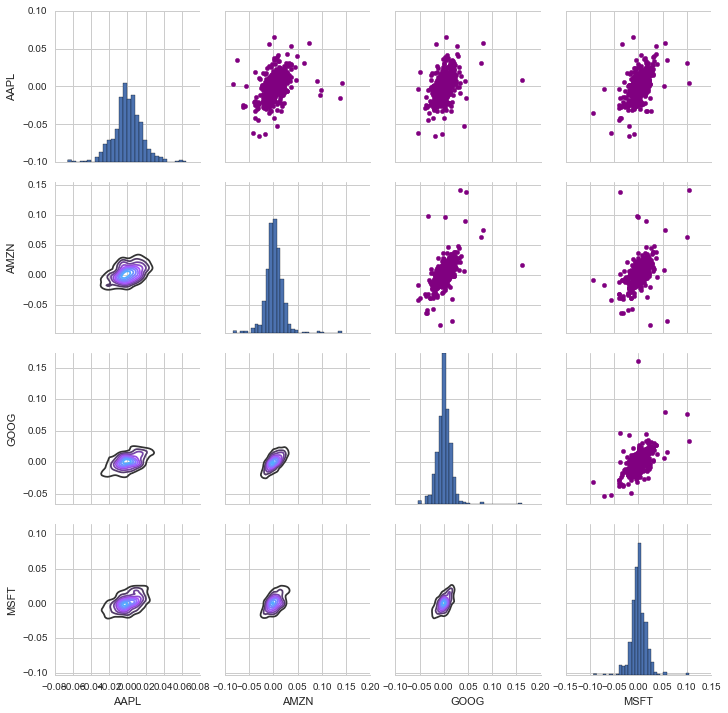

In [25]:
#comparison of daily returns
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())
# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color = "purple")
# We can also define the lower triangle in the figure, inclufing the plot type (kde)
returns_fig.map_lower(sns.kdeplot,cmap = "cool_d")
# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

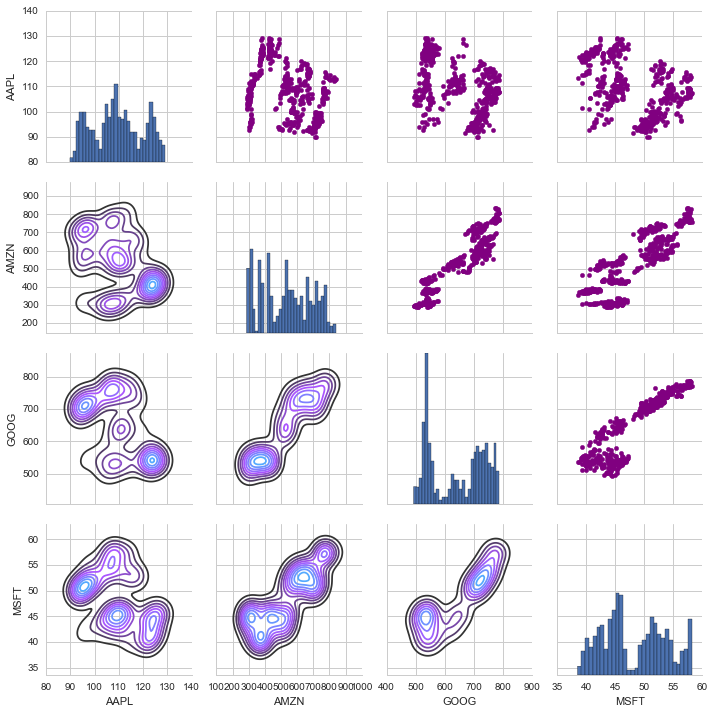

In [26]:
#same plot, on stock prices
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color = "purple")
returns_fig.map_lower(sns.kdeplot,cmap = "cool_d")
returns_fig.map_diag(plt.hist,bins=30)

In [27]:
corr = tech_rets.dropna()
corr = corr.corr()

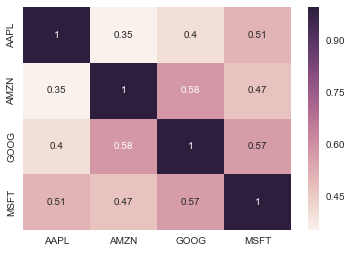

In [28]:
#correlation map between the daily returns
sns.heatmap(corr,annot=True)

In [29]:
corr2 = closing_df.dropna()
corr2 = corr2.corr()

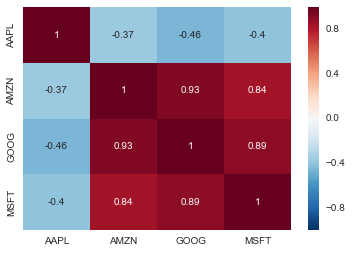

In [30]:
#correlation map between the daily returns
sns.heatmap(corr2,annot=True)


Risk Analysis


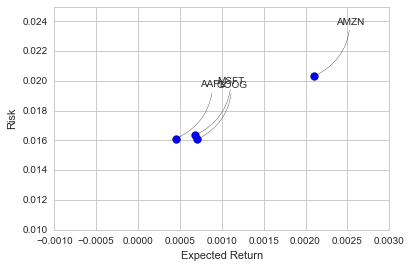

In [31]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")
plt.ylim([0.01,0.025])
plt.xlim([-0.001,0.003])

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

C:\Users\Consultant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


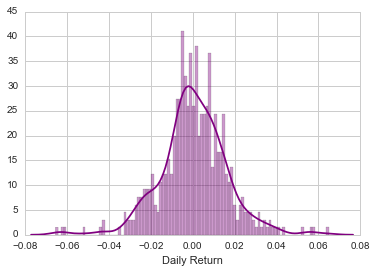

In [32]:
sns.distplot(AAPL["Daily Return"].dropna(),bins=100,color = "purple")

In [33]:
rets["AAPL"].quantile(0.05)

-0.025547471166084485

In [34]:
rets["MSFT"].quantile(0.05)

-0.021396931191257611

In [35]:
rets["AMZN"].quantile(0.05)

-0.023852697654960724

In [36]:
rets["GOOG"].quantile(0.05)

-0.022125875721411635

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation :

ΔS=S(μΔt+σϵ√Δt)

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [37]:
#Time Horizon
days = 365*2
dt = 1/days

mu = rets.mean()["GOOG"]

sigma = rets.std()["GOOG"]

In [38]:
def stock_monte_carlo(start_price,days,mu,sigma):
    #mu is daily returns, sigma is std deviation on daily returns
    price = np.zeros(days)
    price[0]=start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
    # xrange(1,days) in python 2.7 
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    
    return price
    

In [39]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-10-06,578.802636,581.002639,574.442595,577.352614,1214600,577.352614
2014-10-07,574.402629,575.272630,563.742534,563.742534,1911300,563.742534
2014-10-08,565.572566,573.882587,557.492545,572.502582,1990800,572.502582
2014-10-09,571.182555,571.492610,559.062524,560.882518,2524800,560.882518
2014-10-10,557.722546,565.132577,544.052487,544.492476,3081900,544.492476


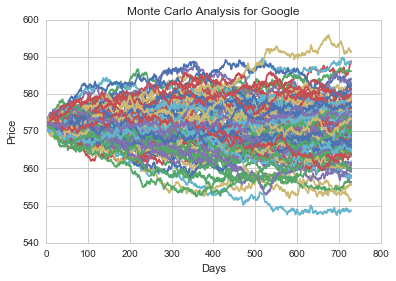

In [40]:
start_price = 571.7526
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title("Monte Carlo Analysis for Google")

In [41]:
runs = 10000

simulations = np.zeros(runs)
for run in range(runs) :
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [42]:
q = np.percentile(simulations,1)

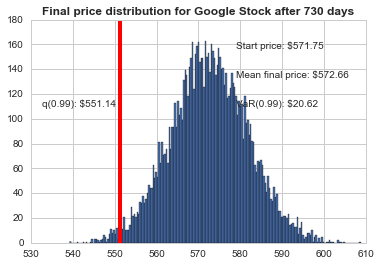

In [43]:
plt.hist(simulations,bins=200)
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [44]:
571.75-551.33

20.41999999999996